In [1]:
import sys
sys.path.append('C:/CASA/Workspace/geopandas')
sys.path.append('C:/CASA/Workspace/sfdata_wrangler/sfdata_wrangler')

import geopandas
import geopandas.tools as tools
import pandas as pd
#from DataFrameViewer import DataFrameViewer

#new viewer needs to be pulled from previous notebook
#viewer = DataFrameViewer()

geopandas.__version__

import csv as csv
import pandas as pd
import numpy as np
import folium
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [55]:
hdffile = "E:/Transit_Casa/Output/sfmuni_monthly_ts.h5"
store = pd.HDFStore(hdffile)
#store.items()
#origin = store.select('stop_day')
df = store.select('stop_day', columns = ['STOP_LAT','STOP_LON','STOP_ID','STOPNAME'])

In [41]:
df.head()

,STOP_LAT,STOP_LON,STOP_ID,STOPNAME,MONTH
0,37.721190,-122.475096,390,19th Avenue & Holloway St,2009-06-01
1,37.765159,-122.477210,392,19TH AVE & LINCOLN WAY,2009-06-01
2,37.723914,-122.435387,660,MISSION ST & OCEAN AVENUE,2009-06-01
3,37.719192,-122.425802,913,DUBLIN ST & LAGRANDE AVE,2009-06-01
4,37.788530,-122.396044,3001,1st St & Howard St,2009-06-01


In [15]:
df.head()

,STOP_LAT,STOP_LON,STOP_ID,STOPNAME
0,37.721190,-122.475096,390,19th Avenue & Holloway St
1,37.765159,-122.477210,392,19TH AVE & LINCOLN WAY
2,37.723914,-122.435387,660,MISSION ST & OCEAN AVENUE
3,37.719192,-122.425802,913,DUBLIN ST & LAGRANDE AVE
4,37.788530,-122.396044,3001,1st St & Howard St


In [56]:
df2 = df.groupby('STOP_ID').mean()
print(len(df2))
df2['STOP_ID'] = df2.index
df2.head()
#There are 3,744 stops in San Francisco

3744


,STOP_LAT,STOP_LON,STOP_ID
STOP_ID,,,
390,37.721190,-122.475096,390
392,37.765159,-122.477210,392
660,37.723914,-122.435387,660
913,37.719192,-122.425802,913
3001,37.788530,-122.396044,3001


In [17]:
df2.STOP_ID.value_counts().head()

4094    1
4791    1
4819    1
6866    1
6862    1
Name: STOP_ID, dtype: int64

In [36]:
# in the future, select out certain performence measurements that we are going to attach to each stop
df3 = store.select('stop_day', columns = ['STOPNAME','STOP_ID'])
print(len(df3))
df3.head()

177415


,STOPNAME,STOP_ID
0,19th Avenue & Holloway St,390
1,19TH AVE & LINCOLN WAY,392
2,MISSION ST & OCEAN AVENUE,660
3,DUBLIN ST & LAGRANDE AVE,913
4,1st St & Howard St,3001


In [9]:
df2.head()

,STOP_LAT,STOP_LON,STOP_ID,geometry
STOP_ID,,,,
390,37.721190,-122.475096,390,POINT (-122.4750960000001 37.72118999999999)
392,37.765159,-122.477210,392,POINT (-122.47721 37.76515900000002)
660,37.723914,-122.435387,660,POINT (-122.4353870000001 37.72391399999997)
913,37.719192,-122.425802,913,POINT (-122.425802 37.71919200000001)
3001,37.788530,-122.396044,3001,POINT (-122.396044 37.78853)


In [35]:
df4 = df3.drop_duplicates()
len(df4)

7745

In [26]:
df4.head()

,STOP_ID,STOPNAME
0,390,19th Avenue & Holloway St
1,392,19TH AVE & LINCOLN WAY
2,660,MISSION ST & OCEAN AVENUE
3,913,DUBLIN ST & LAGRANDE AVE
4,3001,1st St & Howard St


In [29]:
#tried to merge the stop names to the dataframe bu the inner merge is not working properly
df_merge = pd.merge(df2,df4,how = 'inner',on = 'STOP_ID',sort = True)
len(df_merge)

3795

In [9]:
print(df_merge.head())
len(df)

   STOP_LAT    STOP_LON  STOP_ID                    STOPNAME
0  37.72119 -122.475096      390  19th Avenue &  Holloway St
1  37.72119 -122.475096      390  19th Avenue &  Holloway St
2  37.72119 -122.475096      390  19th Avenue &  Holloway St
3  37.72119 -122.475096      390  19th Avenue &  Holloway St
4  37.72119 -122.475096      390  19th Avenue &  Holloway St


177415

In [10]:
df2.head()

,STOP_LAT,STOP_LON,STOP_ID
STOP_ID,,,
390,37.721190,-122.475096,390
392,37.765159,-122.477210,392
660,37.723914,-122.435387,660
913,37.719192,-122.425802,913
3001,37.788530,-122.396044,3001


In [58]:
from shapely.geometry import Point
import geopandas as gp
import shapefile

# Creating Point Geometries with Lat and Long from Stop Table

In [59]:
df2['geometry'] = df2.apply(lambda x: Point((float(x.STOP_LON), float(x.STOP_LAT))), axis=1)

In [60]:
stops = gp.GeoDataFrame(df2, geometry='geometry',crs = df2.crs)

AttributeError: 'DataFrame' object has no attribute 'crs'

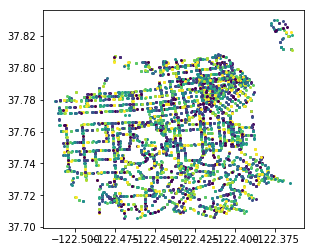

In [11]:
stops.plot()

In [15]:
stops.to_file('Bus_Stops.shp', driver='ESRI Shapefile')

## This is another way to write a shapefile (ignore for now)

In [16]:
stop = shapefile.Writer(shapeType = 1)

In [17]:
#makes sure that the shapefile table is balanced every geometry has data vice versa (look up pyshp documentation)
stop.autoBalance = 1

In [18]:
lx = list(df2['STOP_LON'])
ly = list(df2['STOP_LAT'])

for i in range(0,len(df2)):

    stop.point(x = float(lx[i]),y=float(ly[i]))

In [19]:
len(stop.shapes())

3744

In [1]:
len(df2)


NameError: name 'df2' is not defined

In [21]:
stop.save('stops')

## Creating Buffer Code Resumes Here

In [26]:
#reproject the stops onto a NAD83 NSRS 2007California zone 3 map to allow calculations in US ft 

# this did not work at first so I switched to arc gis

stops = stops.to_crs({'init': 'EPSG:3493'})

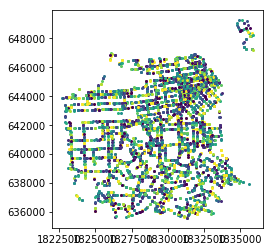

In [17]:
stops.plot()

# Create Buffers Around Bus Stop Points

In [18]:
buffers_third = stops.copy()
buffers_third.geometry = stops.buffer(1760)

In [19]:
buffers_quarter = stops.copy()
buffers_quarter.geometry = stops.buffer(1320)

In [20]:
buffers_tenth = stops.copy()
buffers_tenth.geometry = stops.buffer(528)

# Issues with projections and creating buffers with correct untis
#### Used arc map to define projection as GCS_NAD_1983_2011 
#### reprojected to  NAD_1927_StatePlane_California_III_FIPS_0403
#### Created quarter, third, and half mile buffers using the buffer analysis tool

In [27]:
tenth = gp.read_file('Buffers/Buffers_Tenth.shp')

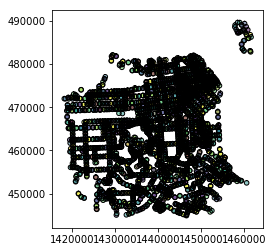

In [28]:
tenth.plot()

In [25]:
third = gp.read_file('Buffers/Buffers_Third.shp')

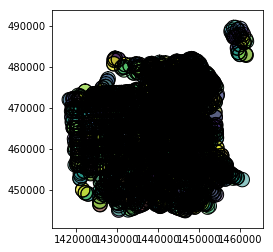

In [26]:
third.plot()

In [27]:
quarter = gp.read_file('Buffers/Buffers_Quarter.shp')

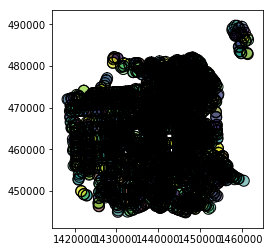

In [28]:
quarter.plot()

In [36]:
import folium
stops_half_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_half_map)

stops_half_map.save('stops_half.html')

In [37]:
stops_third_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_third_map)

stops_third_map.save('stops_third.html')

In [38]:
stops_quarter_map = folium.Map([37.77493,-122.419416], zoom_start=12, tiles='cartodbpositron',control_scale = True)

folium.GeoJson(half).add_to(stops_quarter_map)

stops_quarter_map.save('stops_quarter.html')